In [20]:
import math
import random
import pandas as pd
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import wavio

In [21]:
df = pd.read_csv("./data/sound/train.csv")
example_id2 = df['example_id']
x = df['x']
y = df['TARGET']

In [22]:
df.head(10)

,example_id,x,TARGET
0,0,0.000,0.800000
1,1,0.001,0.800000
2,2,0.002,0.800000
3,3,0.003,0.799999
4,4,0.004,0.799998
5,5,0.005,0.799998
6,6,0.006,0.799996
7,7,0.007,0.799995
8,8,0.008,0.799994
9,9,0.009,0.799992


In [23]:
x.head(5)

0    0.000
1    0.001
2    0.002
3    0.003
4    0.004
Name: x, dtype: float64

Error: 0.8089120852395877
Period: 0.8289913618519444
Amplitud: 0.7773381005972188
Constant: 0.10638395286523378


Error: 0.8036912328246502
Period: 0.8127832828385808
Amplitud: 0.7773356157887114
Constant: 0.10638128067796433


Error: 0.7890832667962614
Period: 0.8514322172960647
Amplitud: 0.7773370784657625
Constant: 0.10637904625187843


Error: 0.7893016615653012
Period: 0.8588484709253988
Amplitud: 0.7773384712075155
Constant: 0.1063792629074419


Error: 0.8466673488943206
Period: 0.8452333998078795
Amplitud: 0.7773341892503745
Constant: 0.10637893470198974


Error: 0.8525222652646164
Period: 0.8264386025146766
Amplitud: 0.7773337336733979
Constant: 0.10638212030449481


Error: 0.7875346087674723
Period: 0.817729694242256
Amplitud: 0.7773362398875314
Constant: 0.10638084222853557


Error: 0.8198472043372491
Period: 0.8069291787790576
Amplitud: 0.7773428085465336
Constant: 0.10637903932881604


Error: 0.8010577217153837
Period: 0.842648692077507
Amplitud: 0.7773408383735609
Constant:

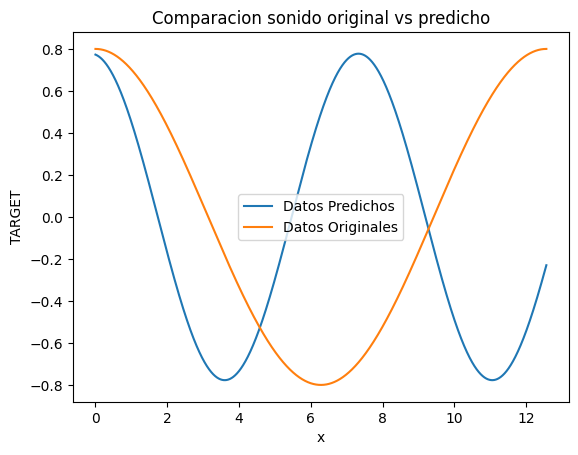

Error: 0.795829203988989
Period: 0.859832955739843
Amplitud: 0.777341085285629
Constant: 0.10637607749425734


Error: 0.8028718111251479
Period: 0.8323399466659843
Amplitud: 0.7773400946137146
Constant: 0.10637559715877747


Error: 0.8082199693049924
Period: 0.8422531419887578
Amplitud: 0.7773410558706578
Constant: 0.1063761296782353


Error: 0.8056230307882517
Period: 0.8297660811688883
Amplitud: 0.7773412401000062
Constant: 0.10637872733624704


Error: 0.8420588202800819
Period: 0.8202460538401951
Amplitud: 0.7773397620616329
Constant: 0.10637972323967348


Error: 0.8397328336199439
Period: 0.8154976081426945
Amplitud: 0.7773397602734069
Constant: 0.10638230255115833


Error: 0.7957062131075718
Period: 0.8243467137049798
Amplitud: 0.7773422666019876
Constant: 0.10638285713981539


Error: 0.7897159248852779
Period: 0.8012563712246445
Amplitud: 0.7773418890740985
Constant: 0.10638026528179272


Error: 0.7711130243351585
Period: 0.8051477140033558
Amplitud: 0.7773472379493561
Constant: 

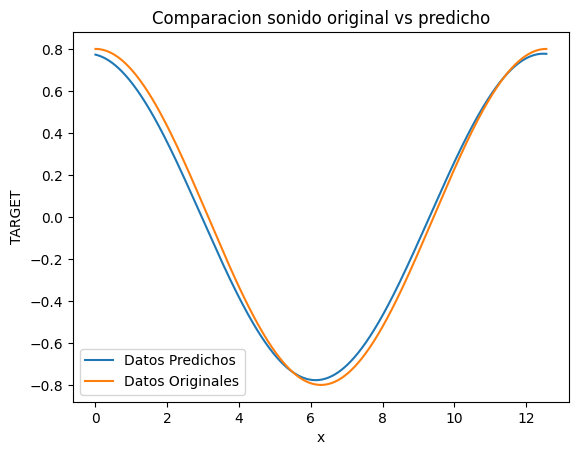

Error: 0.002208351268318278
Period: 0.4954961144639155
Amplitud: 0.7772835306143189
Constant: 0.10639811730855385


Error: 0.002335291112809994
Period: 0.4955808540068764
Amplitud: 0.7772835401317654
Constant: 0.10639790473814281


Error: 0.002355735976811126
Period: 0.4951988743377215
Amplitud: 0.7772837303599575
Constant: 0.10639784112615204


Error: 0.002277140029585413
Period: 0.4956358687187454
Amplitud: 0.7772838190615047
Constant: 0.10639773032427598


Error: 0.002374275710941819
Period: 0.49680546463181363
Amplitud: 0.7772841100904009
Constant: 0.10639769107143067


Error: 0.0026680879413521585
Period: 0.49782295334199217
Amplitud: 0.7772840639038627
Constant: 0.10639772967187498


Error: 0.00306930021632225
Period: 0.4988385215125058
Amplitud: 0.7772839097369405
Constant: 0.10639758442478932


Error: 0.0033480375636851536
Period: 0.4990177318709561
Amplitud: 0.7772839590927108
Constant: 0.10639749109667303


Error: 0.0034944439079149844
Period: 0.499533885245401
Amplitud: 0.77

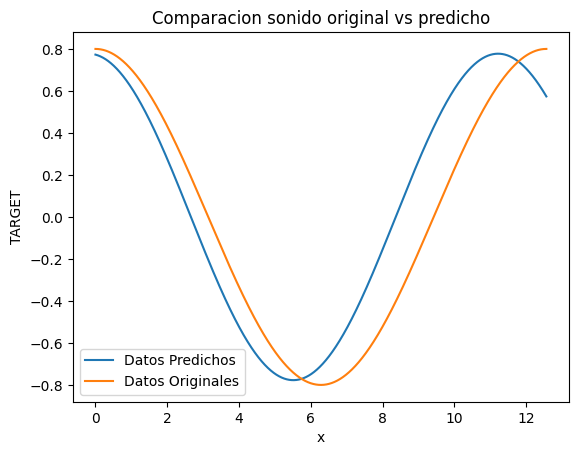

Error: 0.05506576698630189
Period: 0.5546912762498111
Amplitud: 0.7772923731177105
Constant: 0.106393308285084


Error: 0.06423826438222212
Period: 0.5454066249829499
Amplitud: 0.7772915912695484
Constant: 0.1063931788983938


Error: 0.04949784797028578
Period: 0.5400739202869494
Amplitud: 0.7772908485881468
Constant: 0.10639381268537038


Error: 0.03859675485884811
Period: 0.5402473491279514
Amplitud: 0.7772901406083215
Constant: 0.10639414399617785


Error: 0.04003207983767065
Period: 0.5463134655554543
Amplitud: 0.777291061046793
Constant: 0.10639378051066048


Error: 0.04887243142963363
Period: 0.5485634646619207
Amplitud: 0.777290630608239
Constant: 0.10639388006464663


Error: 0.05247512971733698
Period: 0.5491629116452883
Amplitud: 0.7772902192312893
Constant: 0.10639423309756332


Error: 0.05219340170156706
Period: 0.5474799345798147
Amplitud: 0.7772903823986534
Constant: 0.10639370927996525

Error: 0.04896521869476316
Period: 0.5490781636516264
Amplitud: 0.7772904822388358
Con

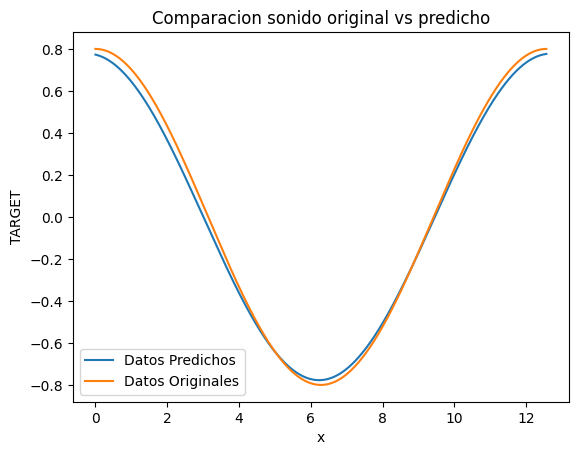

Error: 0.0013121701287536034
Period: 0.4871382463902466
Amplitud: 0.7773035590098627
Constant: 0.10638797370218235


<Figure size 640x480 with 0 Axes>

In [24]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b * x + c) + d

lr = 0.0001
n = len(x)
batch = 2048
epochs = 2000
rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    error = 0
    if i == 9 or i == 399 or i == 999 or i == 1999:
        data_y_hat = []
        a_final = rsl[-1][0]
        b_final = rsl[-1][1]
        c_final = rsl[-1][2]
        for value in x:
            data_y_hat.append(y_predict(a_final, b_final, c_final, d, value))
        plt.plot(x,data_y_hat,label="Datos Predichos")
        plt.plot(x,y,label="Datos Originales")
        plt.xlabel("x")
        plt.ylabel("TARGET")
        plt.title("Comparacion sonido original vs predicho")
        plt.legend()
        plt.show()
        plt.savefig(f'./image/grafica_modelo_epoch_{i+1}.png')
    for m in range(batch):
        ix = random.randint(0,n-1)
        y_pred = y_predict(a,b,c,d,x[ix])
        e = y[ix] - y_pred 
        error += e * e
        a_gradiente += -2*e*math.cos(b*ix+c)
        b_gradiente += 2*e*a*math.sin(b*ix+c)*ix
        c_gradiente += 2*e*a*math.sin(b*ix*c)
    
    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch
    
    error = error/batch
    rsl.append([a,b,c,d,error])
    print(f"Error: {error}\nPeriod: {b}\nAmplitud: {a}\nConstant: {c}\n\n")

In [25]:
data_y_hat = []
a_final = rsl[-1][0]
b_final = rsl[-1][1]
c_final = rsl[-1][2]
for value in x:
    data_y_hat.append(y_predict(a_final, b_final, c_final, d, value))

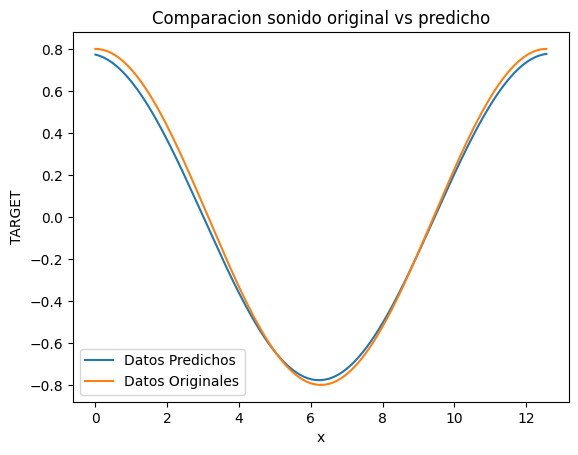

In [26]:
plt.plot(x,data_y_hat,label="Datos Predichos")
plt.plot(x,y,label="Datos Originales")
plt.xlabel("x")
plt.ylabel("TARGET")
plt.title("Comparacion sonido original vs predicho")
plt.legend()
plt.show()

In [27]:
x_min = x.min().min()

long_s = [ y_predict(a_final,b_final,c_final,d,xi) for xi in np.arange(x_min , 500*math.pi, 0.01).astype(np.float32)]

In [28]:
sd.play(long_s,44100)
sd.wait()
wavio.write("./sound/sonido_prediccion.wav",long_s,44100,sampwidth=3)

In [29]:
data_test = pd.read_csv("./data/sound/test.csv")
x_test = data_test['x']
data_test_predicts = []
for value in x_test:
    data_test_predicts.append(y_predict(a_final,b_final,c_final,d,value))

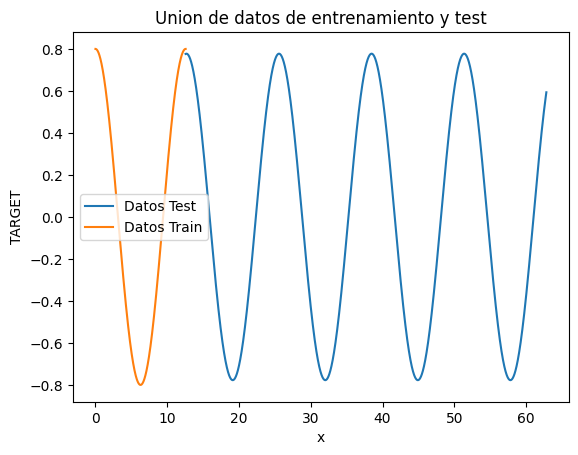

In [33]:
plt.plot(x_test,data_test_predicts,label="Datos Test")
plt.plot(x,y,label="Datos Train")
plt.xlabel("x")
plt.ylabel("TARGET")
plt.title("Union de datos de entrenamiento y test")
plt.legend()
plt.show()

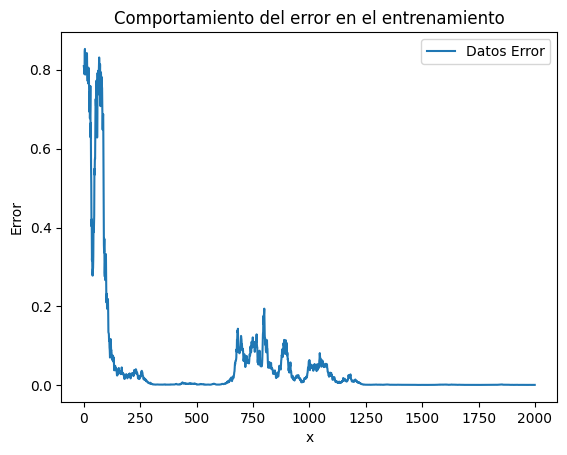

In [31]:
datos_error = [fila[4] for fila in rsl]
plt.plot(range(len(datos_error)), datos_error,label="Datos Error")
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Comportamiento del error en el entrenamiento")
plt.legend()
plt.show()

In [35]:
example_id = data_test['example_id']
df_answer = pd.DataFrame(data= zip(example_id,data_test_predicts),
                      columns=["example_id","TARGET"])
df_answer.to_csv("./predictions/sound/prediction_sound_best.csv", index=False)